# Machine Learning for Social Science

### 1. Doing some basic descriptive statistics

Loading packages for reading datasets

If you would rather to work on a similar analysis on R, go to: https://github.com/propublica/compas-analysis/blob/master/Compas%20Analysis.ipynb

In [1]:
import numpy as np
import pandas as pd

First, we read the dataset

In [2]:
dataset = pd.read_csv('propublica_violent_recidivism.csv')

Take a look to the dataset

In [3]:
dataset.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1.0,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69.0,Greater than 45,Other,...,1.0,Low,2013-08-14,2014-07-07,2014-07-14,0.0,0.0,327.0,0.0,0.0
1,3.0,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34.0,25 - 45,African-American,...,1.0,Low,2013-01-27,2013-01-26,2013-02-05,0.0,9.0,159.0,1.0,1.0
2,5.0,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23.0,Less than 25,African-American,...,6.0,Medium,2013-01-13,NaN,NaN,1.0,0.0,1174.0,0.0,0.0
3,6.0,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43.0,25 - 45,Other,...,1.0,Low,2013-03-26,NaN,NaN,2.0,0.0,1102.0,0.0,0.0
4,7.0,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44.0,25 - 45,Other,...,1.0,Low,2013-11-30,2013-11-30,2013-12-01,0.0,1.0,853.0,0.0,0.0


Which variables do we have?

In [4]:
list(dataset.columns.values)

['id',
 'name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age',
 'age_cat',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_offense_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'is_violent_recid',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score.1',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody',
 'priors_count.1',
 'start',
 'end',
 'event',
 'two_year_recid']

Let's take a look to age, gender, and race distribution

In [5]:
print(dataset.age.describe())

count    4738.000000
mean       35.982693
std        12.187877
min        18.000000
25%        26.000000
50%        33.000000
75%        44.000000
max        83.000000
Name: age, dtype: float64


In [6]:
print(dataset['sex'].value_counts())

Male      3743
Female     995
Name: sex, dtype: int64


In [7]:
print(dataset['race'].value_counts())

African-American    2266
Caucasian           1697
Hispanic             458
Other                279
Asian                 27
Native American       11
Name: race, dtype: int64


In [8]:
print(dataset.groupby('race').age.describe())

                   count       mean        std   min   25%   50%   75%   max
race                                                                        
African-American  2266.0  33.719329  11.136629  18.0  25.0  31.0  39.0  77.0
Asian               27.0  36.148148  13.707672  20.0  25.0  34.0  43.0  76.0
Caucasian         1697.0  38.906305  13.062849  19.0  27.0  37.0  49.0  83.0
Hispanic           458.0  36.683406  11.875641  19.0  27.0  35.0  45.0  83.0
Native American     11.0  32.000000   7.987490  20.0  26.5  29.0  38.5  45.0
Other              279.0  35.573477  11.505745  19.0  26.0  33.0  43.0  70.0


Let's now study the distribution of the score text.

In [9]:
print(dataset['score_text'].value_counts())

Low       2939
Medium    1120
High       679
Name: score_text, dtype: int64


Cross tabs are fun!

In [10]:
ctab_race_scoretext = pd.crosstab(dataset.race, dataset.score_text, margins=True)
print(ctab_race_scoretext)

score_text        High   Low  Medium   All
race                                      
African-American   491  1100     675  2266
Asian                2    22       3    27
Caucasian          127  1242     328  1697
Hispanic            38   345      75   458
Native American      3     5       3    11
Other               18   225      36   279
All                679  2939    1120  4738


### 2. Analyzing the bias in COMPAS

Is there any bias? Let's plot!

In [11]:
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

In [12]:
dataset['decile_score'] = dataset['decile_score'].astype('category')

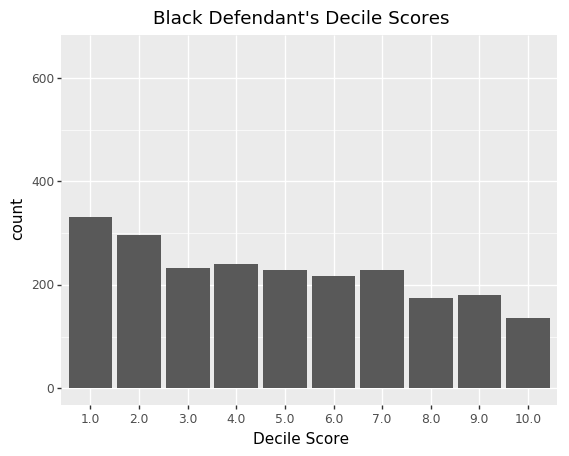

<ggplot: (-9223363276394095756)>

In [13]:
ggplot(dataset.loc[dataset['race'] == 'African-American' ]) + aes(x='decile_score') + geom_bar(size=20) + geom_bar() + xlab("Decile Score") + ylim(0, 650) + ggtitle("Black Defendant's Decile Scores")

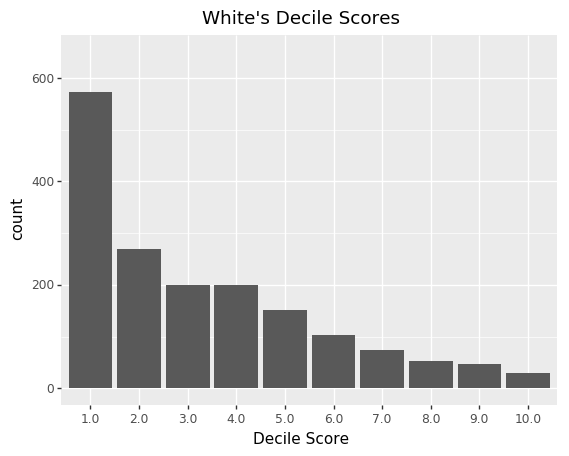

<ggplot: (-9223363276394124046)>

In [14]:
ggplot(dataset.loc[dataset['race'] == 'Caucasian' ]) + aes(x='decile_score') + geom_bar() + xlab("Decile Score") + ylim(0, 650) + ggtitle("White's Decile Scores")

### 3. Building your first ML model

The first model we are going to build is a Decision Tree.

But... What is a Decision Tree?

https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

We first load the required packages.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

We need to transfrom categorical variables into numbers.

In [16]:
dataset['sex_num'] = np.where(dataset['sex'] == 'Male', 0, 1)
dataset['race_num'] = np.where(dataset['race'] == 'Caucasian', 0, 1)

We need to split the dataset intro train and test to avoid overfitting.

In [21]:
X = dataset[['age', 'sex_num', 'race_num', 'priors_count', 'is_recid']]
y = dataset[['two_year_recid']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15, test_size = 0.25)

We need to also transform missing values

In [22]:
c = X_train.select_dtypes(np.number).columns
X_train[c] = X_train[c].fillna(0)
X_train = X_train.fillna("")

y_train = np.where(y_train == 0, 0, 1)

/home/avaldivia/env35/lib/python3.5/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Make the same for test...

In [19]:
# Code here

And then, we build the classifier. But let's take a look first to the Python's documentation.

https://scikit-learn.org/stable/modules/tree.html

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Let's observe the tree...

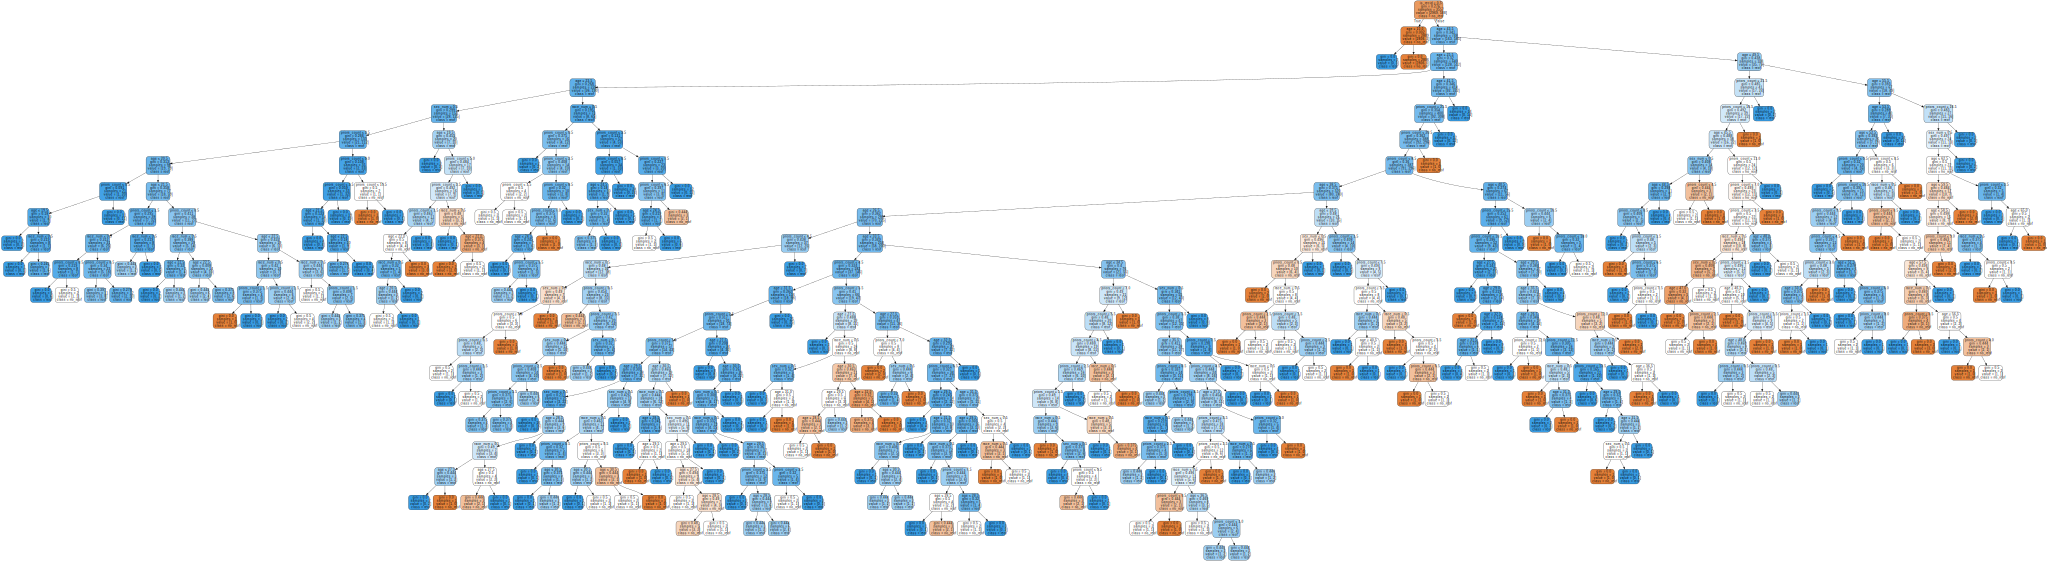

In [25]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("train") 

dot_data = tree.export_graphviz(clf, out_file=None, feature_names = ['age', 'sex_num', 'race_num', 'priors_count', 'is_recid'], class_names = ['no_reof', 'reof'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Now, let's evaluate the model performance. First, we predict or classify the test data.

In [29]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[953,  41],
       [ 47, 145]])

Do we have the same confusion matrix on Blacks than on Caucasians?